<a href="https://colab.research.google.com/github/3madMostafa/selected_project/blob/main/ANN_malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔨kaggle api

In [ ]:
#import os
#os.environ ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [ ]:
#!unzip \*.zip && rm *.zip

☀️ Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
print(os.listdir("/content/Untitled Folder"))

['cell_images']


🍮Image Manipulation

In [ ]:
from glob import glob
Parasitized = glob('/content/Untitled Folder/cell_images/Parasitized/*.png')

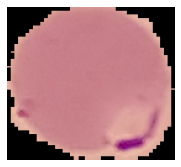

In [ ]:
img = plt.imread(Parasitized[4])
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img)
ax.axis('off')
plt.show()

🍘grayscale

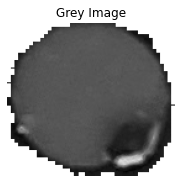

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

🍚Resizing and Scaling

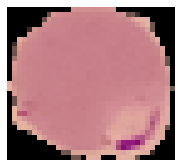

In [ ]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

# 🍮CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;"/>

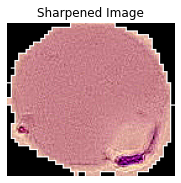

In [ ]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

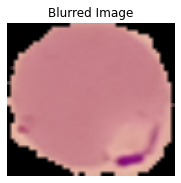

In [ ]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

## 🍘Image Array
(Height, Width, Channels)

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;"/>

In [ ]:
x = list()
y = list()

infected = os.listdir('/content/Untitled Folder/cell_images/Parasitized/') 
uninfected = os.listdir('/content/Untitled Folder/cell_images/Uninfected/')


for i in infected:
    try:
    
        image = cv2.imread("/content/Untitled Folder/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((70 , 70))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        x.append(np.array(blur))
        y.append(1)
        y.append(1)
        y.append(1)
        y.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/Untitled Folder/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((70 , 70))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        y.append(0)
        y.append(0)
        y.append(0)
        
    except AttributeError:
        print('')

x = np.array(x)
y = np.array(y)

Distribution of Pixel Values

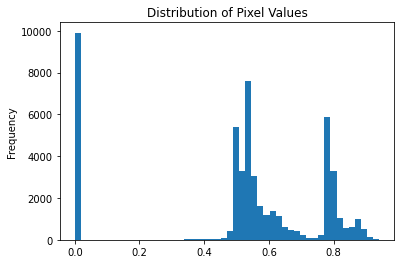

In [ ]:
pd.Series(img.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

In [ ]:
x.shape,y.shape

((96453, 70, 70, 3), (96453,))

In [ ]:
z = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])

In [ ]:
z.shape

(96453, 14700)

🍚 Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size = 0.2,random_state = 42)

In [ ]:
x_train.shape,y_train.dtype,x_train.dtype,y_train.shape

((77162, 14700), dtype('int64'), dtype('uint8'), (77162,))

In [ ]:
x_valid, x_train = x_train[:15000], x_train[15000:]
y_valid, y_train = y_train[:15000], y_train[15000:]
x_test = x_test

In [ ]:
x_train.shape,y_train.dtype,x_train.dtype,y_train.shape

((62162, 14700), dtype('int64'), dtype('uint8'), (62162,))

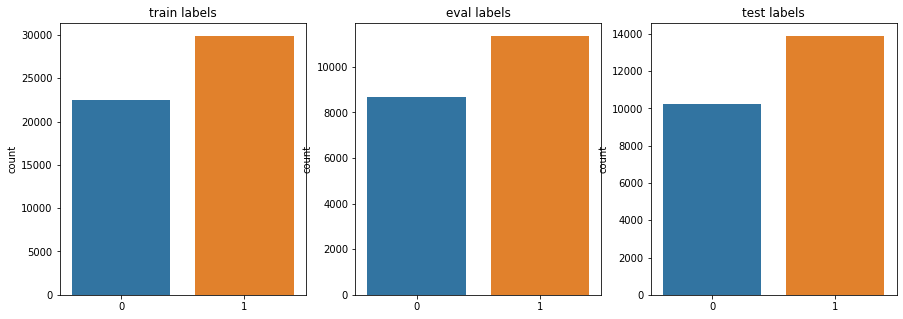

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([y_train , y_valid , y_test] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
class_names = ["Uninfected", "Parasitized"]

In [ ]:
class_names[y_train[0]], class_names[y_train[1]] 

('Parasitized', 'Parasitized')

🖼️sample of images

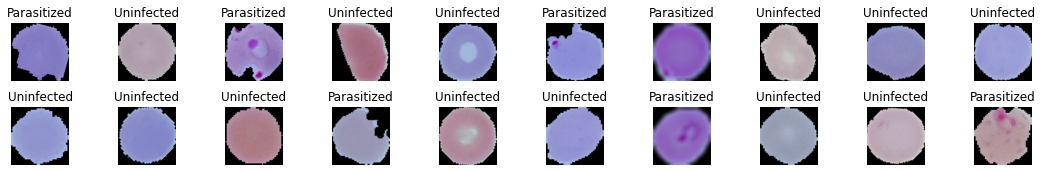

In [ ]:
plt.figure(figsize = (15, 6))
plotnumber = 1
X_tr,X_te,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
for i in range(20):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_tr[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

# ANN(Artificial Neural Network)
* The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.

![Imgur](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)

# Dropout
![](https://i.ibb.co/KydYCbp/d3.gif)


In [41]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten , Dropout
# model_func     
classifier = Sequential() # initialize neural network
Flatten(),
classifier.add(Dense(units = 512, activation = 'relu', input_dim = x_train.shape[1])) # firt hidden layer 
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
# 1st dropout
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 16, activation = 'relu'))
# 2nd dropout
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid')) # last layer
Adam(learning_rate=0.1, name='Adam')
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7526912   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                5

🍮Visualizing model

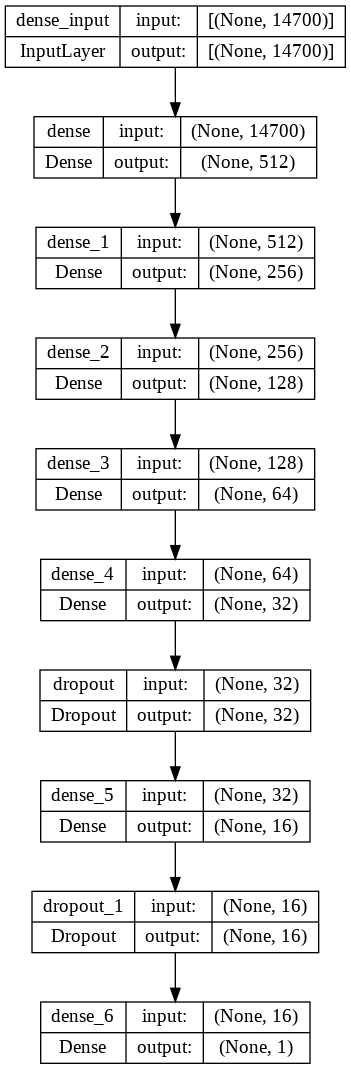

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, show_shapes = True)

## Early stopping
![](https://i.ibb.co/CmJpR3R/early.png)

In [ ]:
import tensorflow as tf
import keras
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=10,
                                              verbose=1,
                                              restore_best_weights=True
)

In [ ]:
x_history = classifier.fit(x_train,y_train,batch_size=128,epochs=100,callbacks=[early_stop], validation_data = (x_valid, y_valid))

Epoch 1/100
486/486 [==============================] - 54s 109ms/step - loss: 0.5972 - accuracy: 0.6637 - val_loss: 0.5460 - val_accuracy: 0.6973
Epoch 2/100
486/486 [==============================] - 55s 112ms/step - loss: 0.5475 - accuracy: 0.7034 - val_loss: 0.5250 - val_accuracy: 0.7215
Epoch 3/100
486/486 [==============================] - 53s 110ms/step - loss: 0.5301 - accuracy: 0.7187 - val_loss: 0.5377 - val_accuracy: 0.7206
Epoch 4/100
486/486 [==============================] - 53s 108ms/step - loss: 0.5204 - accuracy: 0.7257 - val_loss: 0.5152 - val_accuracy: 0.7315
Epoch 5/100
486/486 [==============================] - 55s 113ms/step - loss: 0.5144 - accuracy: 0.7314 - val_loss: 0.5026 - val_accuracy: 0.7384
Epoch 6/100
486/486 [==============================] - 53s 109ms/step - loss: 0.5108 - accuracy: 0.7319 - val_loss: 0.5244 - val_accuracy: 0.7209
Epoch 7/100
486/486 [==============================] - 53s 109ms/step - loss: 0.5007 - accuracy: 0.7414 - val_loss: 0.5183 -

🍚evaluate

In [ ]:
classifier.evaluate(x_test, y_test)

603/603 [==============================] - 10s 17ms/step - loss: 0.4708 - accuracy: 0.7591


[0.47084811329841614, 0.7591104507446289]

🍚 Visualizing Train Accuracies and Number of Epochs

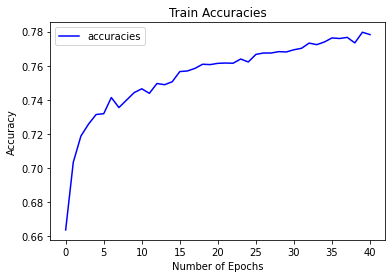

In [ ]:
plt.plot(x_history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

🍚 Visualizing Train loss and Number of Epochs

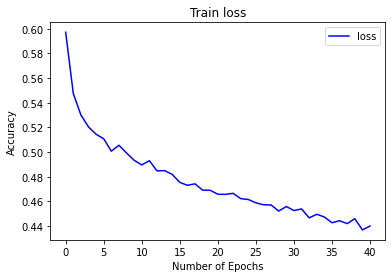

In [ ]:
plt.plot(x_history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

🍚 Visualizing 'Training loss and accuracy' and Number of Epochs

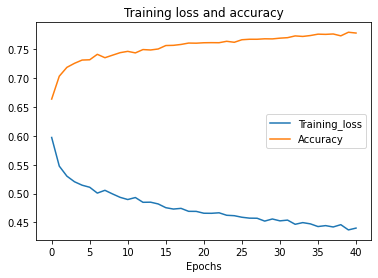

In [ ]:
N=41 #epoch
plt.plot(np.arange(0,N),x_history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),x_history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

Visualizing Training and Validation Loss

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


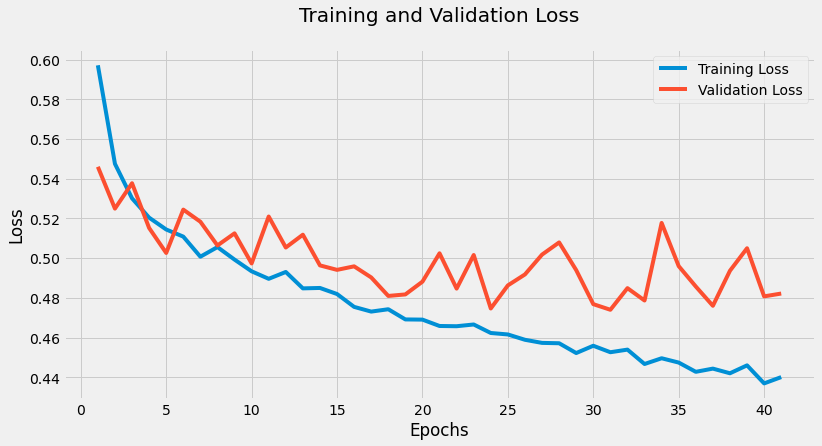

In [ ]:
import seaborn as sns

plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')

train_loss = x_history.history['loss']
val_loss = x_history.history['val_loss'] 
epoch = range(1, 42)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

Visualizing Training and Validation accuracy

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


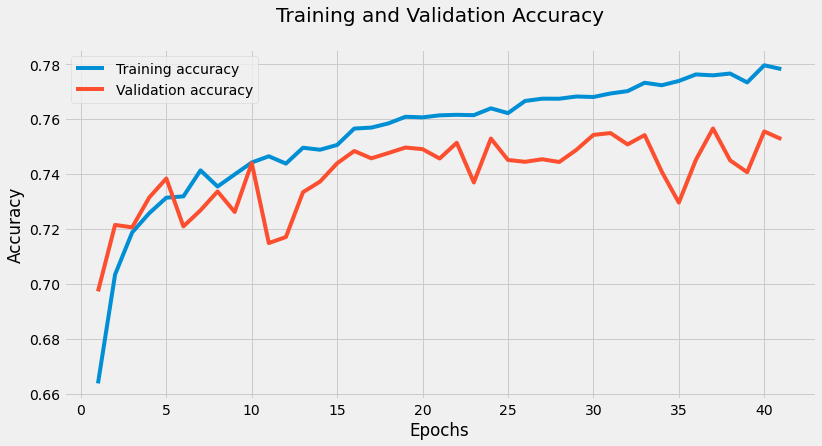

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = x_history.history['accuracy']
val_loss = x_history.history['val_accuracy'] 
epoch = range(1, 42)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

☀️predict

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

603/603 [==============================] - 13s 21ms/step


🍮 Confusion Matrix

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[5747, 2403],
       [2244, 8897]])

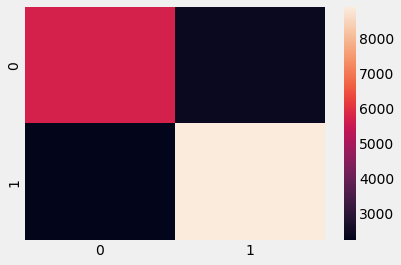

In [ ]:
import seaborn as sns
sns.heatmap(cm)

🍘 save model

In [62]:
classifier.save("new.model.h5")

🍘 classification_report

In [ ]:
from sklearn.metrics import classification_report
pred = classifier.predict(x_test)
x_labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, x_labels))

603/603 [==============================] - 11s 19ms/step
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      8150
           1       0.79      0.80      0.79     11141

    accuracy                           0.76     19291
   macro avg       0.75      0.75      0.75     19291
weighted avg       0.76      0.76      0.76     19291



<ipython-input-53-572442b06c48>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_labels = (pred > 0.5).astype(np.int)


🍘 Computing Area Under Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), x_labels.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.7518675945754999

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

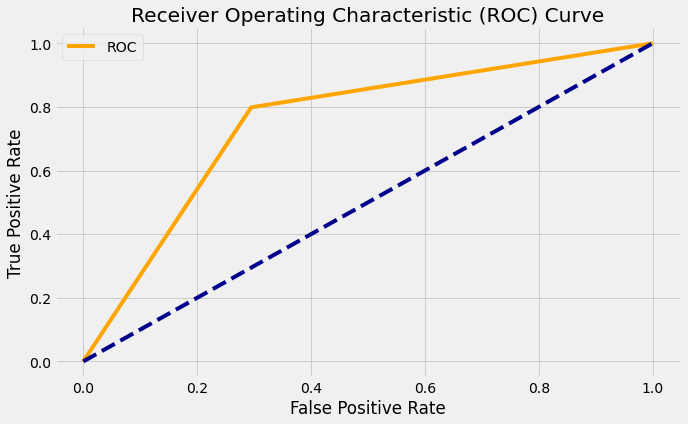

In [ ]:
plot_roc_curve(fpr_keras, tpr_keras)